# Director of Data and Assessment Performance Task

In [1]:
# imporitng packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
# importing data
current_students = pd.read_excel(r'/Users/scipio/Downloads/Performance Task Data Workbook - KIPP Philly.xlsx',
                                 sheet_name = 'Current Students')

_14_15_Enrollments = pd.read_excel(r'/Users/scipio/Downloads/Performance Task Data Workbook - KIPP Philly.xlsx',
                                 sheet_name = '14-15 Enrollments')


MAP = pd.read_excel(r'/Users/scipio/Downloads/Performance Task Data Workbook - KIPP Philly.xlsx',
                                 sheet_name = 'MAP')

MAP = MAP[MAP['map_term']=='Fall'] # <- returning values for Fall

Attendance = pd.read_excel(r'/Users/scipio/Downloads/Performance Task Data Workbook - KIPP Philly.xlsx',
                                 sheet_name = 'Attendance')

In [3]:
# unique grades
current_students['GRADE_LEVEL'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
# unique students
current_students['ID'].nunique()

929

In [5]:
current_students.head(1)

,ID,SCHOOLID,GRADE_LEVEL
0,13291,School A,0


In [6]:
_14_15_Enrollments.head(1)

,STUDENTID,SCHOOLID,COURSE_NAME,COURSE_NUMBER,SECTION_NUMBER,TEACHERID
0,805,School B,6th Grade Math,MAT06,3,5212


In [7]:
# merging current students and 14-15 enrollments on unique student ids in both tables
current_students_merge = current_students.merge(_14_15_Enrollments, left_on = 'ID', 
                       right_on = 'STUDENTID', how = 'inner')

current_students_merge = current_students_merge[['ID','GRADE_LEVEL','SCHOOLID_y', # <- returning relevant columns
                        'COURSE_NAME','COURSE_NUMBER',
                        'SECTION_NUMBER','TEACHERID']]

current_students_merge.head(1)

,ID,GRADE_LEVEL,SCHOOLID_y,COURSE_NAME,COURSE_NUMBER,SECTION_NUMBER,TEACHERID
0,13291,0,School A,Kindergarten Math,MAT00,7,1117


In [8]:
# merging data with MAP results
agg = current_students_merge.merge(MAP,left_on = 'ID', # <- aggregated dataset
                                   right_on = 'studentid', how = 'left')

In [9]:
Attendance.head(1)

,StudentID,schoolid,EventDate,AttendanceCode
0,10020,School B,2014-08-05,P


In [10]:
# attendance percentage function
def att (x):
    """
    P = Present
    EA = Excused Absence 
    ET = Excused Tardy
    UA = Unexcused Absence
    UT = Unexcused Tardy
    S = Suspended
    N/A = No attendance entered
    
    Any of the codes UA, EA, N/A, or S shall beconsidered absent
    """
    if x in (['P','ET','UT']):
        return 1
    elif x in (['UA','EA','N/A','S']):
        return 0
    
Attendance['Att_Calc'] = Attendance['AttendanceCode'].apply(lambda x: att (x))

In [11]:
# creating a df with attendance percentages
att_pct = round(Attendance.groupby('StudentID')['Att_Calc'].mean(),2).reset_index()

In [12]:
# merging attendance data with agg dataset
agg = agg.merge(att_pct, left_on = 'ID', right_on = 'StudentID', how = 'left')
agg.columns

Index(['ID', 'GRADE_LEVEL', 'SCHOOLID_y', 'COURSE_NAME', 'COURSE_NUMBER',
       'SECTION_NUMBER', 'TEACHERID', 'map_school', 'year', 'studentid',
       'grade', 'map_term', 'subject', 'testdurationinminutes', 'testritscore',
       'testpercentile', 'typicalfalltofallgrowth', 'StudentID', 'Att_Calc'],
      dtype='object')

In [13]:
# returning relevant columns
agg = agg[['ID','GRADE_LEVEL','COURSE_NAME','COURSE_NUMBER',
    'SECTION_NUMBER','TEACHERID','map_school','map_term','year','testdurationinminutes', 
     'testritscore','testpercentile', 'typicalfalltofallgrowth','Att_Calc']]

agg['Target_Score'] = agg['testritscore'] + agg['typicalfalltofallgrowth']

In [14]:
agg['Subject'] = agg['COURSE_NUMBER'].str[:3] # <- creating subject row
ELA = agg[agg['Subject']=='ELA'] # <- filtering by subject ELA
MATH = agg[agg['Subject']=='MAT'] # <- filtering by subject MATH

# ELA

In [15]:
# Creaitng df with 2016 (2015-2016)scores
ELA_Actual = ELA[ELA['typicalfalltofallgrowth'].isna()]

In [16]:
# Creating df with 2015 (2014-2015)scores
ELA_Target = ELA[ELA['Target_Score'].notna()][['ID','GRADE_LEVEL','COURSE_NAME',
                                  'COURSE_NUMBER',
                                  'TEACHERID', 'map_school', 'map_term', 
                                  'year','typicalfalltofallgrowth', 'Att_Calc',
                                  'testritscore','Target_Score','testpercentile']]

In [17]:
# merging actual and target ELA results
ELA_Results = ELA_Actual.merge(ELA_Target,on = 'ID', how = 'inner', suffixes = ('_actual','_target'))
ELA_Results.columns

Index(['ID', 'GRADE_LEVEL_actual', 'COURSE_NAME_actual',
       'COURSE_NUMBER_actual', 'SECTION_NUMBER', 'TEACHERID_actual',
       'map_school_actual', 'map_term_actual', 'year_actual',
       'testdurationinminutes', 'testritscore_actual', 'testpercentile_actual',
       'typicalfalltofallgrowth_actual', 'Att_Calc_actual',
       'Target_Score_actual', 'Subject', 'GRADE_LEVEL_target',
       'COURSE_NAME_target', 'COURSE_NUMBER_target', 'TEACHERID_target',
       'map_school_target', 'map_term_target', 'year_target',
       'typicalfalltofallgrowth_target', 'Att_Calc_target',
       'testritscore_target', 'Target_Score_target', 'testpercentile_target'],
      dtype='object')

In [18]:
# returning relevant columns
ELA_Results = ELA_Results[['ID','map_school_target','TEACHERID_target','map_term_target','SECTION_NUMBER',
             'year_target','testritscore_target','typicalfalltofallgrowth_target',
             'map_term_actual','year_actual','testritscore_actual','testpercentile_target',
                           'testpercentile_actual','Target_Score_target','Att_Calc_target']]

ELA_Results.columns

Index(['ID', 'map_school_target', 'TEACHERID_target', 'map_term_target',
       'SECTION_NUMBER', 'year_target', 'testritscore_target',
       'typicalfalltofallgrowth_target', 'map_term_actual', 'year_actual',
       'testritscore_actual', 'testpercentile_target', 'testpercentile_actual',
       'Target_Score_target', 'Att_Calc_target'],
      dtype='object')

In [19]:
# Data Cleaning
ELA_Results = ELA_Results.sort_values(['ID','testritscore_target'],ascending = [True,False]) # <- sorting values
ELA_Results = ELA_Results.drop_duplicates(subset = 'ID', keep = 'first') # <- removing duplicates

In [20]:
def met_f2f (row):
    
    """
    if then function based on initial RIT score, fall to fall goal,
    target score, and RIT score of the following fall  
    """
    if row['testritscore_actual']>= row['Target_Score_target']:
        return 1
    else:
        return 0

def met_f2f_viz (row):
    
    """
    if then function based on initial RIT score, fall to fall goal,
    target score, and RIT score of the following fall  
    """
    if row['testritscore_actual']>= row['Target_Score_target']:
        return 'Met'
    else:
        return 'Not Met' 
    
ELA_Results['Met'] = ELA_Results.apply(met_f2f,axis = 1)
ELA_Results['Met_Viz'] = ELA_Results.apply(met_f2f_viz,axis = 1)

In [21]:
ELA_Results.columns

Index(['ID', 'map_school_target', 'TEACHERID_target', 'map_term_target',
       'SECTION_NUMBER', 'year_target', 'testritscore_target',
       'typicalfalltofallgrowth_target', 'map_term_actual', 'year_actual',
       'testritscore_actual', 'testpercentile_target', 'testpercentile_actual',
       'Target_Score_target', 'Att_Calc_target', 'Met', 'Met_Viz'],
      dtype='object')

In [22]:
# finding percentile metrics
ELA_Percentile  = ELA_Results[['testpercentile_target','testpercentile_actual']].median().reset_index()
ELA_Percentile['index'] = ELA_Percentile['index'].replace('testpercentile_target','Fall 2015 ELA Percentile Median')
ELA_Percentile['index'] = ELA_Percentile['index'].replace('testpercentile_actual','Fall 2016 ELA Percentile Median')
ELA_Percentile.rename(columns = {0:'Median'}, inplace = True)

ELA_Percentile

,index,Median
0,Fall 2015 ELA Percentile Median,37.0
1,Fall 2016 ELA Percentile Median,32.0


In [23]:
def quartile (x):
    if x > 75.0:
        return '4th Quartile'
    elif x > 50:
        return '3rd Quartile'
    elif x > 25.0:
        return '2nd Quartile'
    elif x <=25.0:
        return '1st Quartile'

ELA_Results['Quartile_Target'] = ELA_Results['testpercentile_target'].apply(lambda x: quartile (x))
ELA_Results['Quartile_Actual'] = ELA_Results['testpercentile_actual'].apply(lambda x: quartile (x))


In [24]:
round(ELA_Results['Quartile_Target'].value_counts(normalize = True).mul(100),3)

1st Quartile    34.070
2nd Quartile    33.702
3rd Quartile    24.125
4th Quartile     8.103
Name: Quartile_Target, dtype: float64

In [25]:
round(ELA_Results['Quartile_Actual'].value_counts(normalize = True).mul(100),3)

1st Quartile    38.490
2nd Quartile    30.571
3rd Quartile    26.335
4th Quartile     4.604
Name: Quartile_Actual, dtype: float64

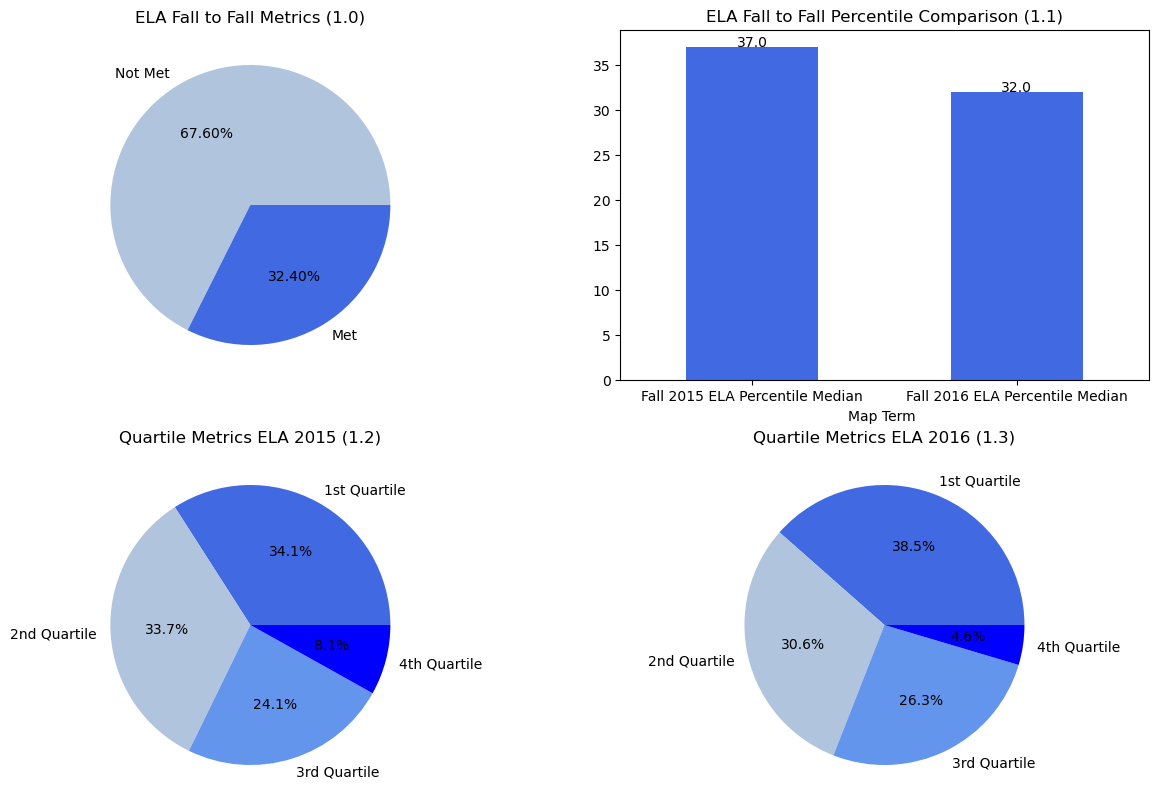

In [26]:
# ELA Fall To Fall Metrics Pie Chart

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10)) # <- creating subplot object
round(ELA_Results['Met_Viz'].value_counts(normalize = True),3).plot(kind = 'pie', ax = ax[0,0],
                                                                title = 'ELA Fall to Fall Metrics (1.0)',
                                                               autopct = '%1.2f%%', 
                                                                colors = ['lightsteelblue','royalblue'], ylabel ='')

ELA_Percentile.plot(kind = 'bar', x = 'index', y = 'Median' , 
                    color = 'royalblue', title = 'ELA Fall to Fall Percentile Comparison (1.1)',
                    ax = ax[0,1], rot = 0, legend = False, xlabel = 'Map Term ')

round(ELA_Results['Quartile_Target'].value_counts(normalize = True).mul(100),3).plot(kind = 'pie', title = 'Quartile Metrics ELA 2015 (1.2)',
                                                                                    autopct = '%.1f%%', ax = ax[1,0],
                                                                                     colors = ['royalblue','lightsteelblue','cornflowerblue','blue'],
                                                                                    ylabel = '')
round(ELA_Results['Quartile_Actual'].value_counts(normalize = True).mul(100),3).plot(kind = 'pie', title = 'Quartile Metrics ELA 2016 (1.3)',
                                                                                    autopct = '%.1f%%', ax = ax[1,1],
                                                                                     colors = ['royalblue','lightsteelblue','cornflowerblue','blue'],
                                                                                    ylabel = '')



# labels
for i,v in enumerate(ELA_Percentile['Median']):
    ax[0,1].text(i,v,str(v), ha = 'center')
    
plt.show()

- 32.4 % of students achieved fall to fall growth in ELA.
- The percentile ranking of ELA MAP decreased during the same time period due an increase in student performance in the first quartile.

In [27]:
# forumula for chronic absenteeism
def chron_abs (x):
    """
    chronic absenteeism is defined as a 
    students missing more than 10% of school days
    """
    if x > .90:
        return 'No'
    else:
        return 'Yes'
    
ELA_Results['Chron_Abs'] = ELA_Results['Att_Calc_target'].apply(lambda x:chron_abs (x))

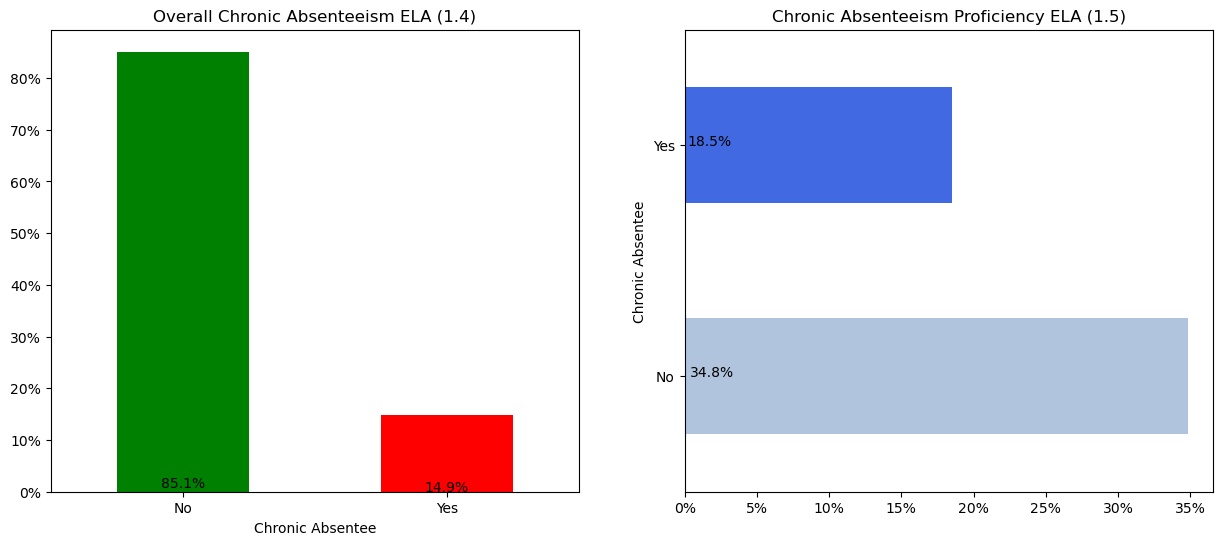

In [28]:
fig,ax = plt.subplots(nrows = 1, ncols =2 , figsize = (15,6))

# Chronic Absenteeism
ELA_Results['Chron_Abs'].value_counts(normalize = True).mul(100).plot(kind = 'bar', rot = 0, 
                                                             title = 'Overall Chronic Absenteeism ELA (1.4)',
                                                            color = ['green','red'], ax = ax[0], 
                                                            xlabel = 'Chronic Absentee')
ax[0].yaxis.set_major_formatter(PercentFormatter()) # <- formatting y-axis

# % of fall to fall goals met by chronic absenteeism in ELA
ELA_Results.groupby('Chron_Abs')['Met'].mean().mul(100).plot(kind = 'barh',
                                                            title = 'Chronic Absenteeism Proficiency ELA (1.5)', 
                                                             ax = ax[1],color = ['lightsteelblue','royalblue'],
                                                            ylabel = 'Chronic Absentee')
ax[1].xaxis.set_major_formatter(PercentFormatter(decimals = 0)) # <- formatting x-axis


# labels
for i,v in enumerate(round(ELA_Results['Chron_Abs'].value_counts(normalize = True),3)):
    ax[0].text(i,v,str(f'{v:.1%}'), ha = 'center')
    

for i,v in enumerate(round(ELA_Results.groupby('Chron_Abs')['Met'].mean(),3)):
    ax[1].text(v,i,str(f'{v:.1%}'))
    
plt.show()


In [29]:
# chronic absenteeism metrics
Chron_abs_metrcs = round(ELA_Results.groupby('Chron_Abs')['Met'].mean(),3).mul(100).reset_index().sort_values('Met')
Chron_abs_metrcs['diff'] = Chron_abs_metrcs ['Met'].diff().fillna(0)
Chron_abs_metrcs['pct_change'] = round(Chron_abs_metrcs ['Met'].pct_change(),3).mul(100).fillna(0)
Chron_abs_metrcs

,Chron_Abs,Met,diff,pct_change
1,Yes,18.5,0.0,0.0
0,No,34.8,16.3,88.1


- 14.9% of the students that took the ELA MAP test were chronically absent.
- There was a 16.3% (88.1%) difference in performance between studenst that were chronically absent in comparison to students who were not chronically absent on the ELA MAP test.

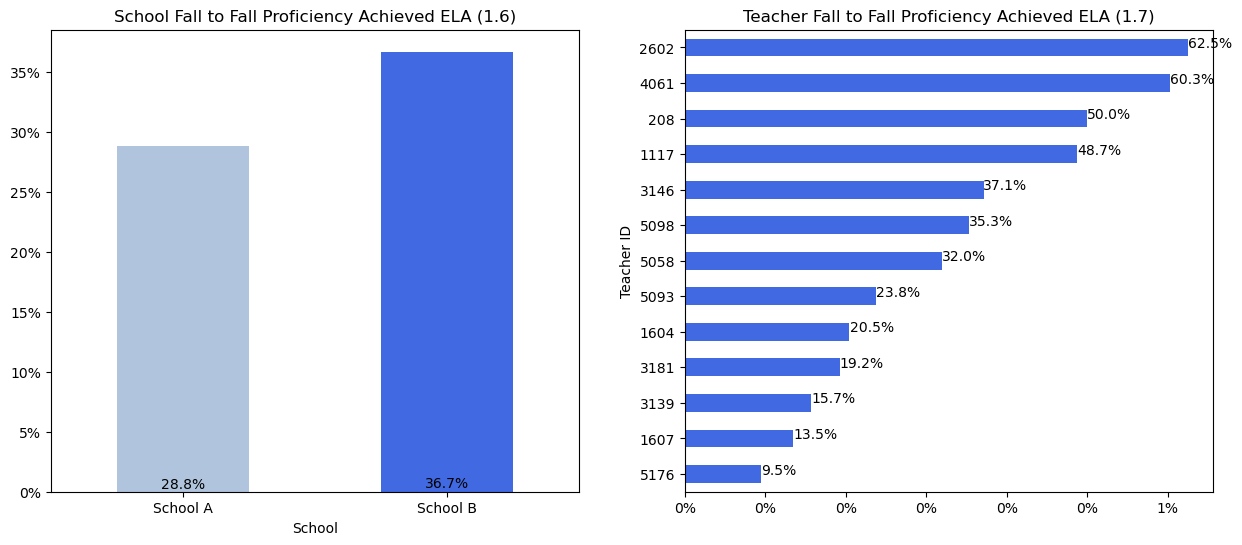

In [45]:
# fall to fall goals met by teacher
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15,6))

teacher_met = ELA_Results.groupby('TEACHERID_target')['Met'].mean().reset_index().sort_values('Met')
teacher_met.plot(kind = 'barh',x  = 'TEACHERID_target', y = 'Met', ax = ax[1],
                title = 'Teacher Fall to Fall Proficiency Achieved ELA (1.7)', legend = False, 
                 color = 'royalblue', ylabel = 'Teacher ID')
ax[1].xaxis.set_major_formatter(PercentFormatter(decimals = 0)) # <- formatting x-axis



# fall to fall to fall goals met by school
round(ELA_Results.groupby('map_school_target')['Met'].mean(),3).mul(100).plot(kind = 'bar',ax = ax[0],color = ['lightsteelblue','royalblue'],
                                                                     title = 'School Fall to Fall Proficiency Achieved ELA (1.6)', 
                                                                     rot = 0, xlabel = 'School' )
ax[0].yaxis.set_major_formatter(PercentFormatter(decimals = 0)) # <- formatting y-axis



# labels
for i,v in enumerate(round(ELA_Results.groupby('map_school_target')['Met'].mean(),3)):
    ax[0].text(i,v,str(f'{v:.1%}'), ha = 'center')
    

for i,v in enumerate(round(teacher_met['Met'],3)):
    ax[1].text(v,i,str(f'{v:.1%}'))

- School B had the highest percentage of students achieve fall to fall growth in ELA.
- Teacher 2602 had the highest percentage of students achieve fall to fall typical growth in ELA. 

# MATH

In [31]:
# Creaitng df with 2016 (2015-2016)scores
MATH_Actual = MATH[MATH['typicalfalltofallgrowth'].isna()]

In [32]:
# Creating df with 2015 (2014-2015)scores
MATH_Target = MATH[MATH['Target_Score'].notna()][['ID','GRADE_LEVEL','COURSE_NAME',
                                  'COURSE_NUMBER',
                                  'TEACHERID', 'map_school', 'map_term', 
                                  'year','typicalfalltofallgrowth','Att_Calc',
                                  'testritscore','Target_Score','testpercentile']]

In [33]:
# merging actual and target MATH results
MATH_Results = MATH_Actual.merge(MATH_Target,on = 'ID', how = 'inner', suffixes = ('_actual','_target'))
MATH_Results.columns

Index(['ID', 'GRADE_LEVEL_actual', 'COURSE_NAME_actual',
       'COURSE_NUMBER_actual', 'SECTION_NUMBER', 'TEACHERID_actual',
       'map_school_actual', 'map_term_actual', 'year_actual',
       'testdurationinminutes', 'testritscore_actual', 'testpercentile_actual',
       'typicalfalltofallgrowth_actual', 'Att_Calc_actual',
       'Target_Score_actual', 'Subject', 'GRADE_LEVEL_target',
       'COURSE_NAME_target', 'COURSE_NUMBER_target', 'TEACHERID_target',
       'map_school_target', 'map_term_target', 'year_target',
       'typicalfalltofallgrowth_target', 'Att_Calc_target',
       'testritscore_target', 'Target_Score_target', 'testpercentile_target'],
      dtype='object')

In [34]:
# returning relevant columns
MATH_Results = MATH_Results[['ID','map_school_target','TEACHERID_target','map_term_target','SECTION_NUMBER',
             'year_target','testritscore_target','typicalfalltofallgrowth_target',
             'map_term_actual','year_actual','testritscore_actual','testpercentile_target','testpercentile_actual',
             'Target_Score_target','Att_Calc_target']]

MATH_Results.columns

Index(['ID', 'map_school_target', 'TEACHERID_target', 'map_term_target',
       'SECTION_NUMBER', 'year_target', 'testritscore_target',
       'typicalfalltofallgrowth_target', 'map_term_actual', 'year_actual',
       'testritscore_actual', 'testpercentile_target', 'testpercentile_actual',
       'Target_Score_target', 'Att_Calc_target'],
      dtype='object')

In [35]:
# Data Cleaning
MATH_Results = MATH_Results.sort_values(['ID','testritscore_target'],ascending = [True,False]) # <- sorting values
MATH_Results = MATH_Results.drop_duplicates(subset = 'ID', keep = 'first') # <- removing duplicates

In [36]:
def met_f2f (row):
    
    """
    if then function based on initial RIT score, fall to fall goal,
    target score, and RIT score of the following fall  
    """
    if row['testritscore_actual']>= row['Target_Score_target']:
        return 1
    else:
        return 0

def met_f2f_viz (row):
    
    """
    if then function based on initial RIT score, fall to fall goal,
    target score, and RIT score of the following fall  
    """
    if row['testritscore_actual']>= row['Target_Score_target']:
        return 'Met'
    else:
        return 'Not Met' 
    
MATH_Results['Met'] = MATH_Results.apply(met_f2f,axis = 1)
MATH_Results['Met_Viz'] = MATH_Results.apply(met_f2f_viz,axis = 1)

In [37]:
# finding percentile metrics
MATH_Percentile  = MATH_Results[['testpercentile_target','testpercentile_actual']].median().reset_index()
MATH_Percentile['index'] = MATH_Percentile['index'].replace('testpercentile_target','Fall 2015 MATH Percentile Median')
MATH_Percentile['index'] = MATH_Percentile['index'].replace('testpercentile_actual','Fall 2016 MATH Percentile Median')
MATH_Percentile.rename(columns = {0:'Median'}, inplace = True)

MATH_Percentile

,index,Median
0,Fall 2015 MATH Percentile Median,39.0
1,Fall 2016 MATH Percentile Median,33.0


In [38]:
def quartile (x):
    if x > 75.0:
        return '4th Quartile'
    elif x > 50:
        return '3rd Quartile'
    elif x > 25.0:
        return '2nd Quartile'
    elif x <=25.0:
        return '1st Quartile'

MATH_Results['Quartile_Target'] = MATH_Results['testpercentile_target'].apply(lambda x: quartile (x))
MATH_Results['Quartile_Actual'] = MATH_Results['testpercentile_actual'].apply(lambda x: quartile (x))

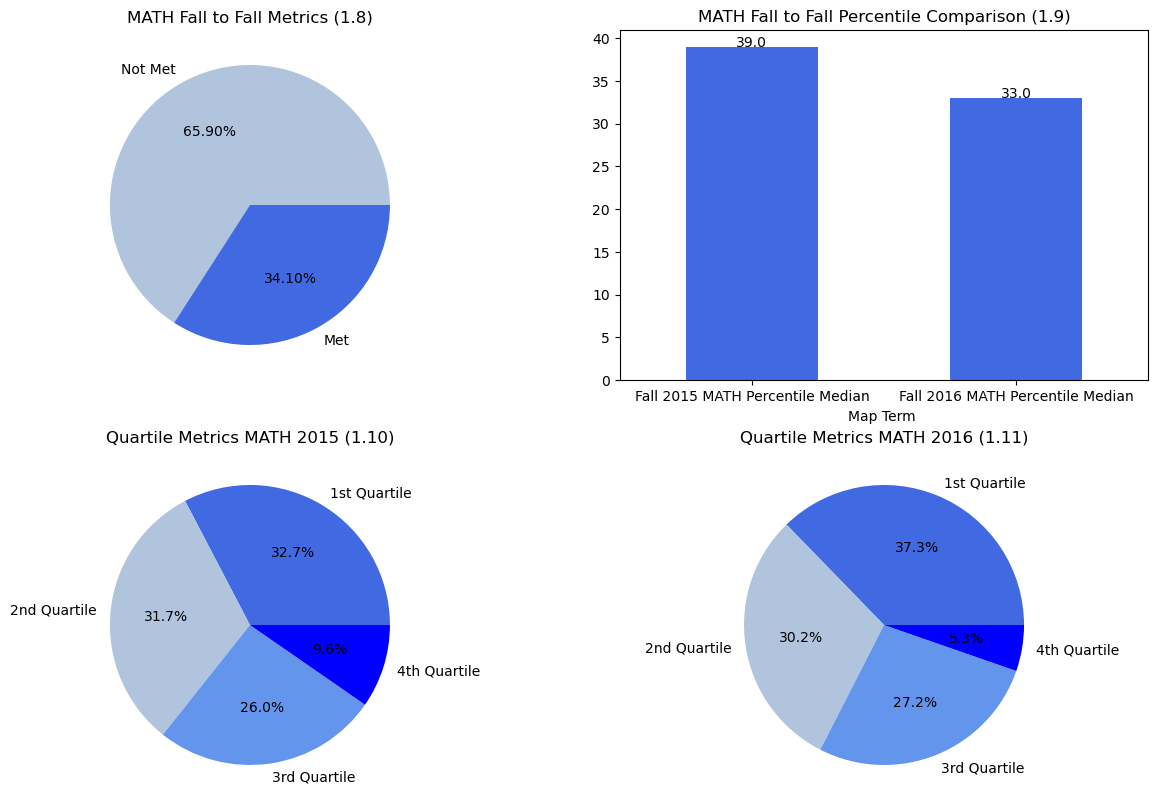

In [46]:
# MATH Fall To Fall Metrics Pie Chart

fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15,10))

round(MATH_Results['Met_Viz'].value_counts(normalize = True),3).plot(kind = 'pie', ax = ax[0,0],
                                                                title = 'MATH Fall to Fall Metrics (1.8)',
                                                               autopct = '%1.2f%%', 
                                                                colors = ['lightsteelblue','royalblue'], ylabel ='')

MATH_Percentile.plot(kind = 'bar', x = 'index', y = 'Median' , 
                    color = 'royalblue', title = 'MATH Fall to Fall Percentile Comparison (1.9)',
                    ax = ax[0,1], rot = 0, legend = False, xlabel = 'Map Term ')

round(MATH_Results['Quartile_Target'].value_counts(normalize = True).mul(100),3).plot(kind = 'pie', title = 'Quartile Metrics MATH 2015 (1.10)',
                                                                                    autopct = '%.1f%%', ax = ax[1,0],
                                                                                     colors = ['royalblue','lightsteelblue','cornflowerblue','blue'],
                                                                                    ylabel = '')
round(MATH_Results['Quartile_Actual'].value_counts(normalize = True).mul(100),3).plot(kind = 'pie', title = 'Quartile Metrics MATH 2016 (1.11)',
                                                                                    autopct = '%.1f%%', ax = ax[1,1],
                                                                                     colors = ['royalblue','lightsteelblue','cornflowerblue','blue'],
                                                                                    ylabel = '')





# labels
for i,v in enumerate(MATH_Percentile['Median']):
    ax[0,1].text(i,v,str(v), ha = 'center')
    
plt.show()
plt.show()

- 34.1% of students achieved fall to fall growth in MATH
- The percentile ranking fell during the same time period due to an increase in student performance in the 1st quartile.

In [40]:
# forumula for chronic absenteeism
def chron_abs (x):
    """
    chronic absenteeism is defined as a 
    students missing more than 10% of school days
    """
    if x > .90:
        return 'No'
    else:
        return 'Yes'
    
MATH_Results['Chron_Abs'] = MATH_Results['Att_Calc_target'].apply(lambda x:chron_abs (x))

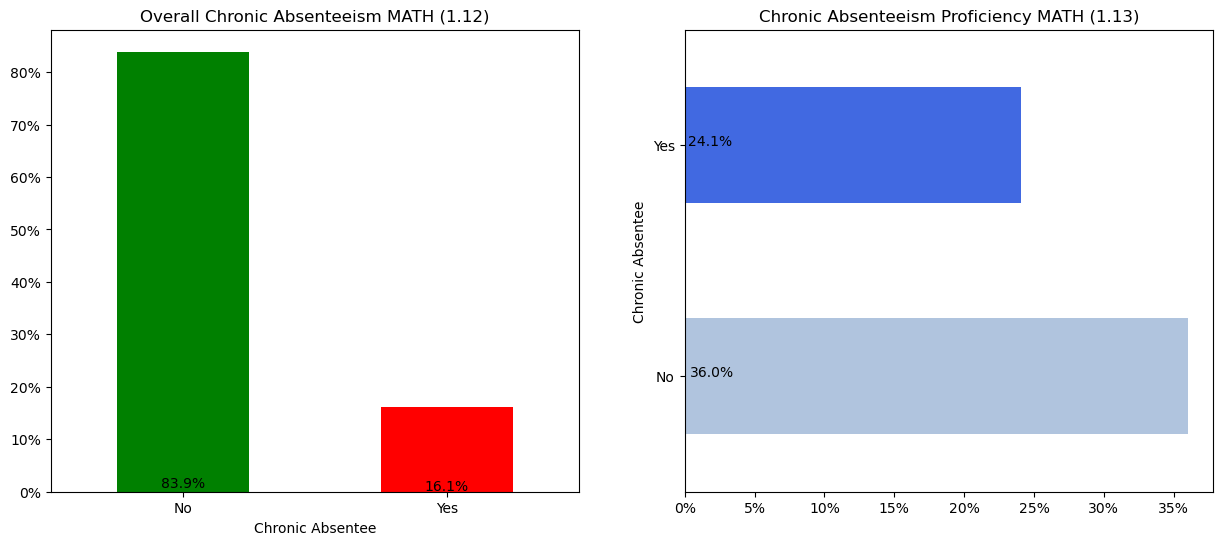

In [47]:
fig,ax = plt.subplots(nrows = 1, ncols =2 , figsize = (15,6))

# Chronic Absenteeism
MATH_Results['Chron_Abs'].value_counts(normalize = True).mul(100).plot(kind = 'bar', rot = 0, 
                                                             title = 'Overall Chronic Absenteeism MATH (1.12)',
                                                            color = ['green','red'], ax = ax[0], 
                                                            xlabel = 'Chronic Absentee')
ax[0].yaxis.set_major_formatter(PercentFormatter()) # <- formatting y-axis

# % of fall to fall goals met by chronic absenteeism in MATH
MATH_Results.groupby('Chron_Abs')['Met'].mean().mul(100).plot(kind = 'barh',
                                                            title = 'Chronic Absenteeism Proficiency MATH (1.13)', 
                                                             ax = ax[1],color = ['lightsteelblue','royalblue'],
                                                            ylabel = 'Chronic Absentee')
ax[1].xaxis.set_major_formatter(PercentFormatter(decimals = 0)) # <- formatting x-axis


# labels
for i,v in enumerate(round(MATH_Results['Chron_Abs'].value_counts(normalize = True),3)):
    ax[0].text(i,v,str(f'{v:.1%}'), ha = 'center')
    

for i,v in enumerate(round(MATH_Results.groupby('Chron_Abs')['Met'].mean(),3)):
    ax[1].text(v,i,str(f'{v:.1%}'))
    
plt.show()


In [42]:
# chronic absenteeism metrics
Chron_abs_metrcs = round(MATH_Results.groupby('Chron_Abs')['Met'].mean(),3).mul(100).reset_index().sort_values('Met')
Chron_abs_metrcs['diff'] = Chron_abs_metrcs ['Met'].diff().fillna(0)
Chron_abs_metrcs['pct_change'] = round(Chron_abs_metrcs ['Met'].pct_change(),3).mul(100).fillna(0)
Chron_abs_metrcs

,Chron_Abs,Met,diff,pct_change
1,Yes,24.1,0.0,0.0
0,No,36.0,11.9,49.4


- 16.1% of the students that took the MATH MAP test were chronically absent.
- There was a 11.9% (49.4%) difference in performance between studenst that were chronically absent in comparison to students who were not chronically absent on the MATH MAP test.

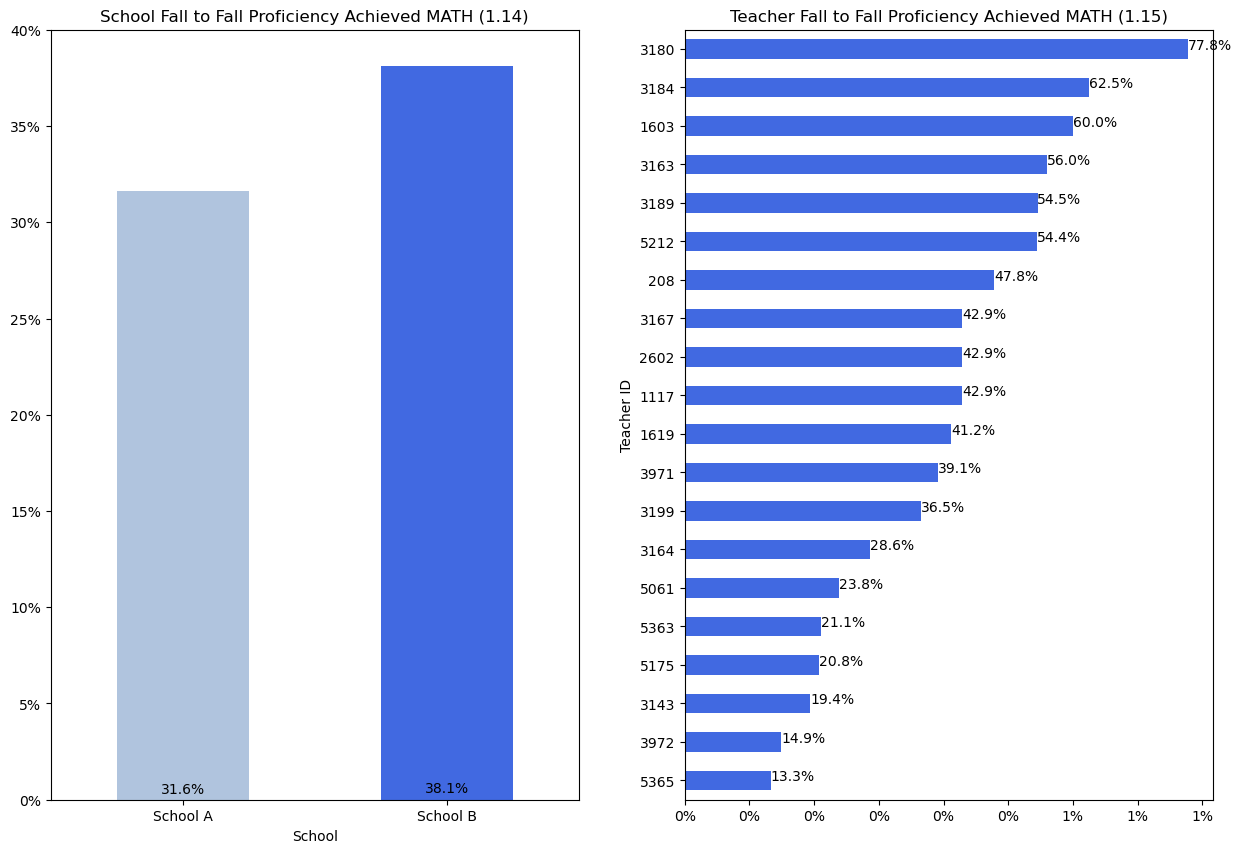

In [48]:
# fall to fall goals met by teacher
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15,10))

teacher_met = MATH_Results.groupby('TEACHERID_target')['Met'].mean().reset_index().sort_values('Met')
teacher_met.plot(kind = 'barh',x  = 'TEACHERID_target', y = 'Met', ax = ax[1],
                title = 'Teacher Fall to Fall Proficiency Achieved MATH (1.15)', legend = False, 
                 color = 'royalblue', ylabel = 'Teacher ID')
ax[1].xaxis.set_major_formatter(PercentFormatter(decimals = 0)) # <- formatting x-axis



# fall to fall to fall goals met by school
round(MATH_Results.groupby('map_school_target')['Met'].mean(),3).mul(100).plot(kind = 'bar',ax = ax[0],color = ['lightsteelblue','royalblue'],
                                                                     title = 'School Fall to Fall Proficiency Achieved MATH (1.14)', 
                                                                     rot = 0, xlabel = 'School' )
ax[0].yaxis.set_major_formatter(PercentFormatter(decimals = 0)) # <- formatting y-axis



# labels
for i,v in enumerate(round(MATH_Results.groupby('map_school_target')['Met'].mean(),3)):
    ax[0].text(i,v,str(f'{v:.1%}'), ha = 'center')
    

for i,v in enumerate(round(teacher_met['Met'],3)):
    ax[1].text(v,i,str(f'{v:.1%}'))

- School B had the highest percentage of students achieve fall to fall growth in MATH.
- Teacher 3180 had the highest percentage of students achieve fall to fall growth in MATH. 